In [1]:
%pwd

'/Users/David/Dropbox/Apuntes/Máster/Asignaturas/Stellar astrophysics/Project'

In [2]:
import numpy as np
import pandas as pd
import generate_models as gm
import read_data as rd
import cluster as clus
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit as curve_fit
from matplotlib.ticker import ScalarFormatter

In [3]:
# read the initial parameters
parameters = pd.read_csv('./output_cluster/great_initial.csv').values.tolist()

In [4]:
mass = [model[0] for model in parameters]
radius = [model[5] for model in parameters]
Teff = [model[7] for model in parameters]
L = [model[8] for model in parameters]
estimated_lifetime = [model[10] for model in parameters]

Text(0, 0.5, 'Number of stars')

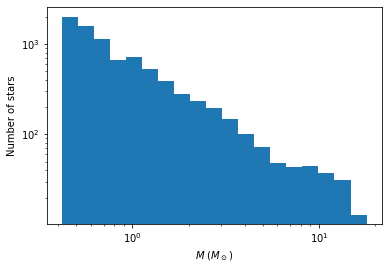

In [58]:
# mass histogram
bins=np.logspace(np.log10(min(mass)),np.log10(max(mass)),20)
plt.hist(mass,bins)
ax=plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('$M$ ($M_\odot$)')
plt.ylabel('Number of stars')

In [6]:
# total luminosity
luminosity = clus.cluster_luminosity(parameters)
print('Initial luminosity: {:0.0f} solar luminosities'.format(luminosity))

Initial luminosity: 1613431 solar luminosities


Text(0, 0.5, '$L_\\lambda$ (erg s$^{-1}$ cm$^{-1}$)')

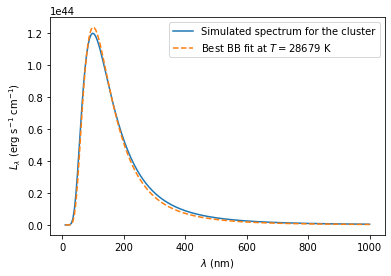

In [7]:
# spectrum (linear scale)
def spectrumfit(lamb, T,A):
    return A*clus.planck_function(T, lamb)
lamb, spectrum = clus.cluster_spectrum(parameters,lambdamin=10,lambdamax=1000)
plt.plot(lamb, spectrum)
model=curve_fit(spectrumfit, lamb/10**9, spectrum,p0=[2.9e4,1.42e26])
Teffclus = model[0][0]
Aclus = model[0][1]
eTeffclus = model[1][0,0]
eAclus = model[1][1,1]
plt.plot(lamb,Aclus*clus.planck_function(Teffclus,lamb/10**9),'--')
plt.legend(['Simulated spectrum for the cluster','Best BB fit at $T=${:2.0f} K'.format(Teffclus)])
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('$L_\lambda$ (erg s$^{-1}$ cm$^{-1}$)')

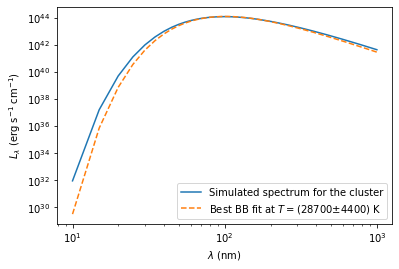

In [8]:
# spectrum (loglog scale)
def spectrumfit(lamb, T,A):
    return A*clus.planck_function(T, lamb)
lamb, spectrum = clus.cluster_spectrum(parameters,lambdamin=10,lambdamax=1000)
plt.plot(lamb, spectrum)
model=curve_fit(spectrumfit, lamb/10**9, spectrum,p0=[2.9e4,1.42e26])
Teffclus = model[0][0]
Aclus = model[0][1]
eTeffclus = model[1][0,0]
eAclus = model[1][1,1]
plt.plot(lamb,Aclus*clus.planck_function(Teffclus,lamb/10**9),'--')
plt.legend(['Simulated spectrum for the cluster','Best BB fit at $T=(${0:2.0f}$\pm${1:2.0f}) K'.format(round(Teffclus,-int(round(np.log10(eTeffclus)))+2), round(eTeffclus,-int(round(np.log10(eTeffclus)))+2))])
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('$L_\lambda$ (erg s$^{-1}$ cm$^{-1}$)')
ax=plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

(0.01479006233275773, 66013.07990570154)

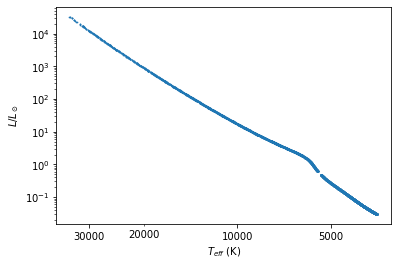

In [82]:
# hrd
plt.scatter(Teff, L, s=0.5)
ax=plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
ax.invert_xaxis()
plt.xlabel('$T_{eff}$ (K)')
plt.ylabel('$L/L_\odot$')
plt.xticks([30000,10000,5000])
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_locator(plt.MultipleLocator(10000))
ax.xaxis.set_minor_formatter(ScalarFormatter())
ax.set_xlim([max(Teff)*1.1,min(Teff)*0.9])
ax.set_ylim([min(L)*0.5, max(L)*2])

### Let's include time evolution (naive version)

In [35]:
#just a check
-len(clus.kill_stars(parameters,100e6)) + len(parameters)

333

In [11]:
len(parameters)

8241

In [67]:
t = 100e6

In [68]:
newparameters = clus.kill_stars(parameters,t)
newmass = [model[0] for model in newparameters]
newradius = [model[5] for model in newparameters]
newTeff = [model[7] for model in newparameters]
newL = [model[8] for model in newparameters]
newestimated_lifetime = [model[10] for model in newparameters]

Text(0.5, 1.0, '$\\Delta t$ = 100 Myr')

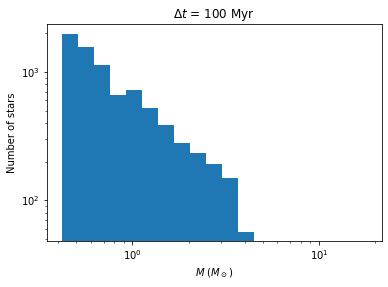

In [69]:
# mass histogram
bins=np.logspace(np.log10(min(mass)),np.log10(max(mass)),20)
plt.hist(newmass,bins)
ax=plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('$M$ ($M_\odot$)')
plt.ylabel('Number of stars')
plt.title('$\Delta t$ = 100 Myr')

In [70]:
# total luminosity
newluminosity = clus.cluster_luminosity(newparameters)
print('Luminosity at 100 Myr: {:0.0f} solar luminosities'.format(newluminosity))

Luminosity at 100 Myr: 73341 solar luminosities


Text(0.5, 1.0, '$\\Delta t$ = 100 Myr')

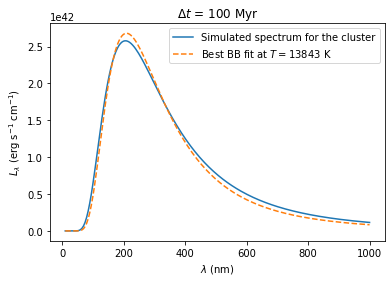

In [72]:
lamb, newspectrum = clus.cluster_spectrum(newparameters,lambdamin=10,lambdamax=1000)
plt.plot(lamb, newspectrum)
newmodel=curve_fit(spectrumfit, lamb/10**9, newspectrum,p0=[2.9e4,1.42e26])
newTeffclus = newmodel[0][0]
newAclus = newmodel[0][1]
neweTeffclus = newmodel[1][0,0]
neweAclus = newmodel[1][1,1]
plt.plot(lamb,newAclus*clus.planck_function(newTeffclus,lamb/10**9),'--')
plt.legend(['Simulated spectrum for the cluster','Best BB fit at $T=${:2.0f} K'.format(newTeffclus)])
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('$L_\lambda$ (erg s$^{-1}$ cm$^{-1}$)')
plt.title('$\Delta t$ = 100 Myr')

Text(0.5, 1.0, '$\\Delta t$ = 100 Myr')

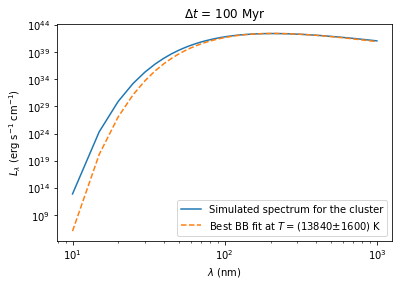

In [74]:
lamb, newspectrum = clus.cluster_spectrum(newparameters,lambdamin=10,lambdamax=1000)
plt.plot(lamb, newspectrum)
newmodel=curve_fit(spectrumfit, lamb/10**9, newspectrum,p0=[2.9e4,1.42e26])
newTeffclus = newmodel[0][0]
newAclus = newmodel[0][1]
neweTeffclus = newmodel[1][0,0]
neweAclus = newmodel[1][1,1]
plt.plot(lamb,newAclus*clus.planck_function(newTeffclus,lamb/10**9),'--')
plt.legend(['Simulated spectrum for the cluster','Best BB fit at $T=(${0:2.0f}$\pm${1:2.0f}) K'.format(round(newTeffclus,-int(round(np.log10(neweTeffclus)))+2), round(neweTeffclus,-int(round(np.log10(neweTeffclus)))+2))])
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('$L_\lambda$ (erg s$^{-1}$ cm$^{-1}$)')
ax=plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.title('$\Delta t$ = 100 Myr')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


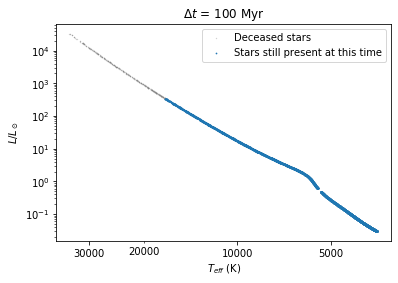

In [89]:
# hrd
plt.scatter(Teff, L, c=(0.5,0.5,0.5,0.5), s=0.1)
plt.scatter(newTeff, newL, s=0.5)
ax=plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
ax.invert_xaxis()
plt.xlabel('$T_{eff}$ (K)')
plt.ylabel('$L/L_\odot$')
plt.title('')
plt.xticks([30000,10000,5000])
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_locator(plt.MultipleLocator(10000))
ax.xaxis.set_minor_formatter(ScalarFormatter())
plt.title('$\Delta t$ = 100 Myr')
ax.set_xlim([max(Teff)*1.1,min(Teff)*0.9])
ax.set_ylim([min(L)*0.5, max(L)*2])
ax.legend(['Deceased stars','Stars still present at this time'])